<a href="https://colab.research.google.com/github/kaleabendrias/data_sc/blob/main/spamornot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
spam_df = pd.read_csv("/content/emails.csv")
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
ham = spam_df[spam_df['spam'] == 0]
spam = spam_df[spam_df['spam'] == 1]

Lets see the precentage of spam and not spam messages


In [6]:
print('spam percentage = ', (len(spam) / len(spam_df))*100, '%')

spam percentage =  23.88268156424581 %


In [7]:
print('ham percentage = ', (len(ham) / len(spam_df))*100, '%')

ham percentage =  76.11731843575419 %


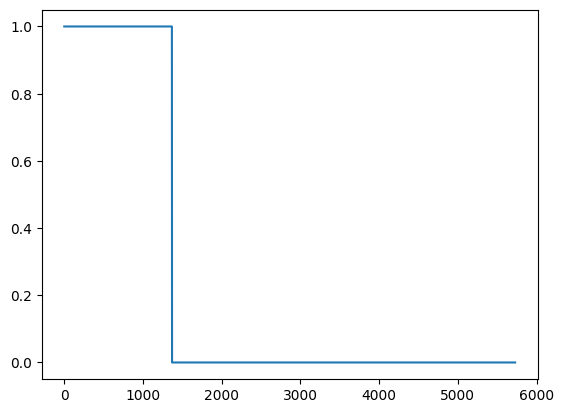

In [9]:
plt.plot(spam_df['spam'], label = 'count spam vs ham')

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [11]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
spamham_countvectorizer.shape

(5728, 37303)

In [13]:
label = spam_df['spam'].values

**Now lets start training the model**

In [14]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(spamham_countvectorizer, label)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

write ur own tests and try them on the model

In [24]:
testing_sample = ['Free money!', 'Hi kaleab let me know if there is question.']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

test the model with the tests using .predict

In [25]:
test_predict = model.predict(testing_sample_countvectorizer)
test_predict

array([1, 0])

# **lets divide into training and testing now**

In [18]:
from sklearn.model_selection import train_test_split

X = spamham_countvectorizer
y= label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

we will train it

In [19]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# **now it is time for evaluation**

<Axes: >

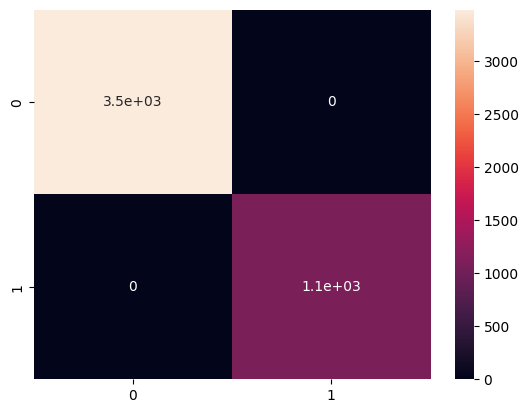

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = model.predict(X_train)

cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<Axes: >

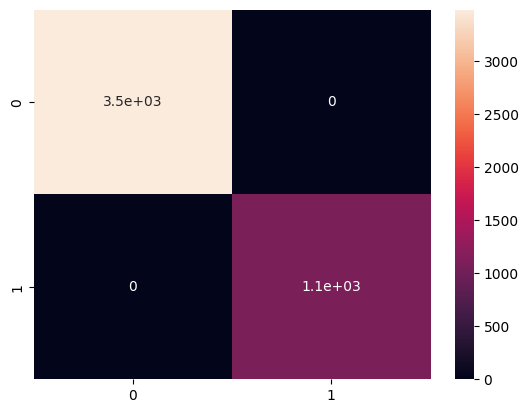

In [22]:
y_predict_test = model.predict(X_test)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)